In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [2]:
with open('../track_coverage_pub.json') as user_file:
  coverage_file = json.load(user_file)
print(coverage_file.keys())
print(len(coverage_file['crs']))
print(len(coverage_file['features']))
print(len(coverage_file['name']))
print(len(coverage_file['type']))

dict_keys(['crs', 'features', 'name', 'type'])
2
33682
11
17


In [3]:
(coverage_file['features'])[0]['geometry']['coordinates'][0][2][0]

73.65487540554724

In [4]:
AOT_medians = []
keys_contained_AOT = []
keys_not_contained_AOT = []
WV_medians = []
keys_contained_WV = []
keys_not_contained_WV = []
elev = []
lat = []
lon = []
for i in range(len(coverage_file['features'])):
    if 'Retrieved AOT Median' in (coverage_file['features'][i])['properties']:
        AOT_medians.append(((coverage_file['features'][i])['properties'])['Retrieved AOT Median'])
        keys_contained_AOT.append(i)
    else:
        keys_not_contained_AOT.append(i)

    if 'Retrieved WV Median' in (coverage_file['features'][i])['properties']:
        WV_medians.append(((coverage_file['features'][i])['properties'])['Retrieved WV Median'])
        elev.append(((coverage_file['features'][i])['properties'])['Retrieved Ele. Median'])
        keys_contained_WV.append(i)
        lat_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][0]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][0]))/2
        lon_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][1]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][1]))/2
        lat.append(lat_average)
        lon.append(lon_average)
    else:
        keys_not_contained_WV.append(i)



In [5]:
print(len(lat))
print(len(lon))

33503
33503


In [6]:
print('keys contained: ', len(keys_contained_AOT))
print('keys not contained: ', len(keys_not_contained_AOT))
print ('total scenes: ', len(keys_contained_AOT) + len(keys_not_contained_AOT))
print('keys contained: ', len(keys_contained_WV))
print('keys not contained: ', len(keys_not_contained_WV))
print ('total scenes: ', len(keys_contained_WV) + len(keys_not_contained_WV))

keys contained:  33503
keys not contained:  179
total scenes:  33682
keys contained:  33503
keys not contained:  179
total scenes:  33682


In [7]:
"""
AOT_medians = np.array(AOT_medians)
plt.hist(AOT_medians)
plt.title('Frequency Distribution of Retrieved AOT Medians')
plt.xlabel('AOT (g/cm^2)')
plt.ylabel('Frequency')
"""

"\nAOT_medians = np.array(AOT_medians)\nplt.hist(AOT_medians)\nplt.title('Frequency Distribution of Retrieved AOT Medians')\nplt.xlabel('AOT (g/cm^2)')\nplt.ylabel('Frequency')\n"

In [8]:
print(max(lat))
print(min(lat))
print(max(lon))
print(min(lon))

174.7768774528327
-161.2921850030075
51.83544095470044
-51.77855573902544


Text(0, 0.5, 'Frequency')

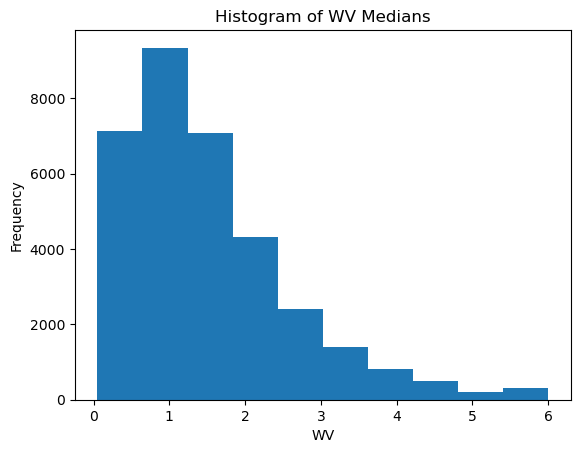

In [9]:
plt.hist(WV_medians)
plt.title('Histogram of WV Medians')
plt.xlabel('WV')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

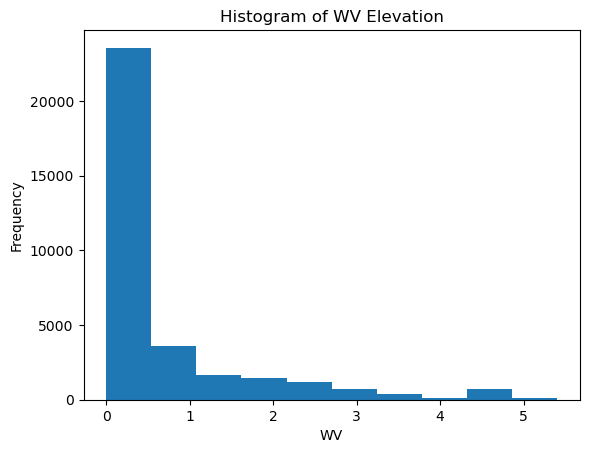

In [10]:
plt.hist(elev)
plt.title('Histogram of WV Elevation')
plt.xlabel('WV')
plt.ylabel('Frequency')

In [11]:
#max(elev) -> 5.4

In [12]:
df = pd.DataFrame(lat, columns=['Latitude'])
df['Longitude'] = lon
df['WV'] = WV_medians
df['elev'] = elev

In [13]:
df.head()

,Latitude,Longitude,WV,elev
0,73.462646,21.543773,0.24,3.17
1,73.963529,22.116728,0.09,2.75
2,74.468918,22.687622,0.12,2.52
3,74.978765,23.256703,0.08,2.55
4,75.493399,23.823590,3.88,0.96


C:\Users\vpatro\AppData\Local\Temp\ipykernel_1436\1158321909.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(142.84722222222223, 0.5, 'Longitude')

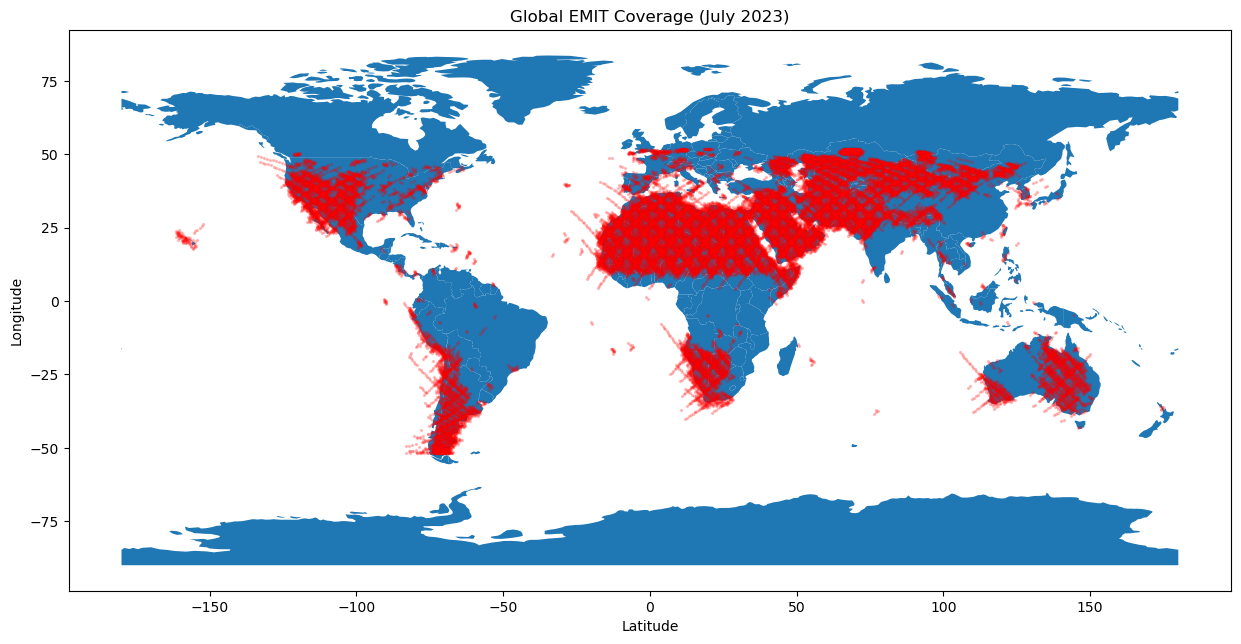

In [17]:
geometry = [Point(xy) for xy in zip(df['Latitude'], df['Longitude'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (15,15)), marker = 'o', color = 'red', markersize = 2, alpha = 0.2);
plt.title('Global EMIT Coverage (July 2023)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

C:\Users\vpatro\AppData\Local\Temp\ipykernel_20168\772839474.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


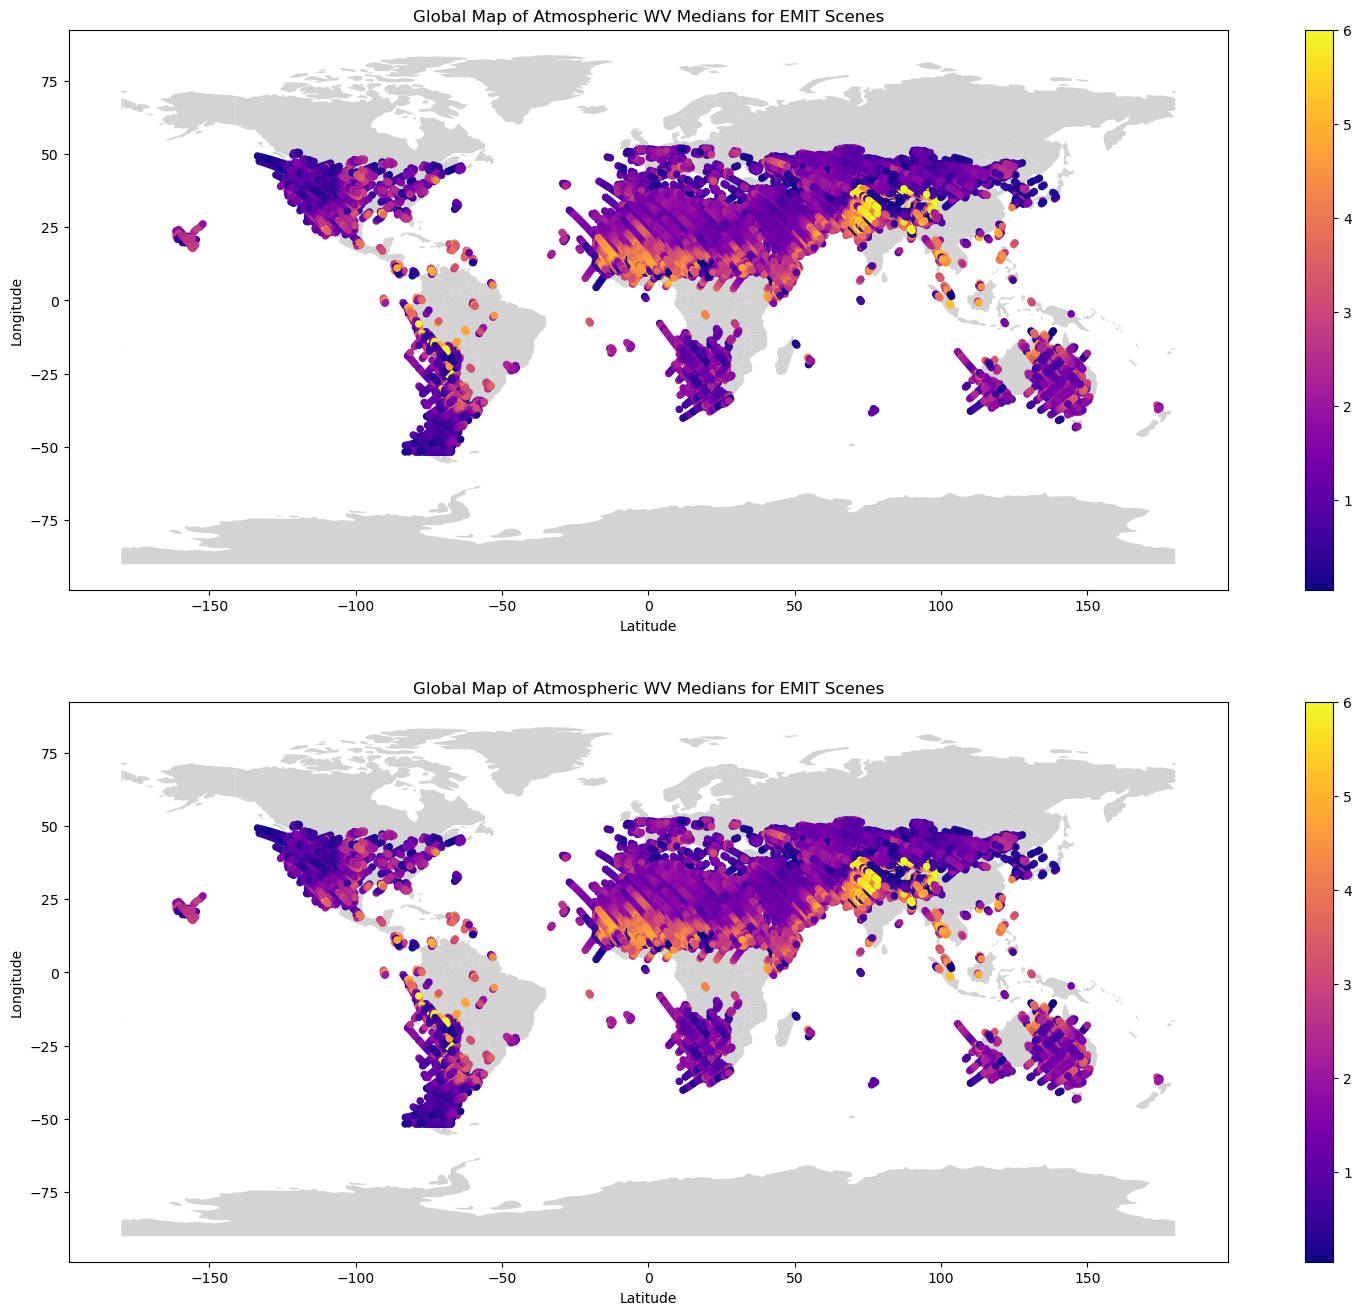

In [104]:
title = 'Global Map of Atmospheric WV Medians for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    df.plot(x="Latitude", y="Longitude", kind="scatter", c=df['WV'], colormap="plasma", title= title, ax=ax[i])


In [105]:
df_shortened = df[32000:]

C:\Users\vpatro\AppData\Local\Temp\ipykernel_20168\2639103319.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


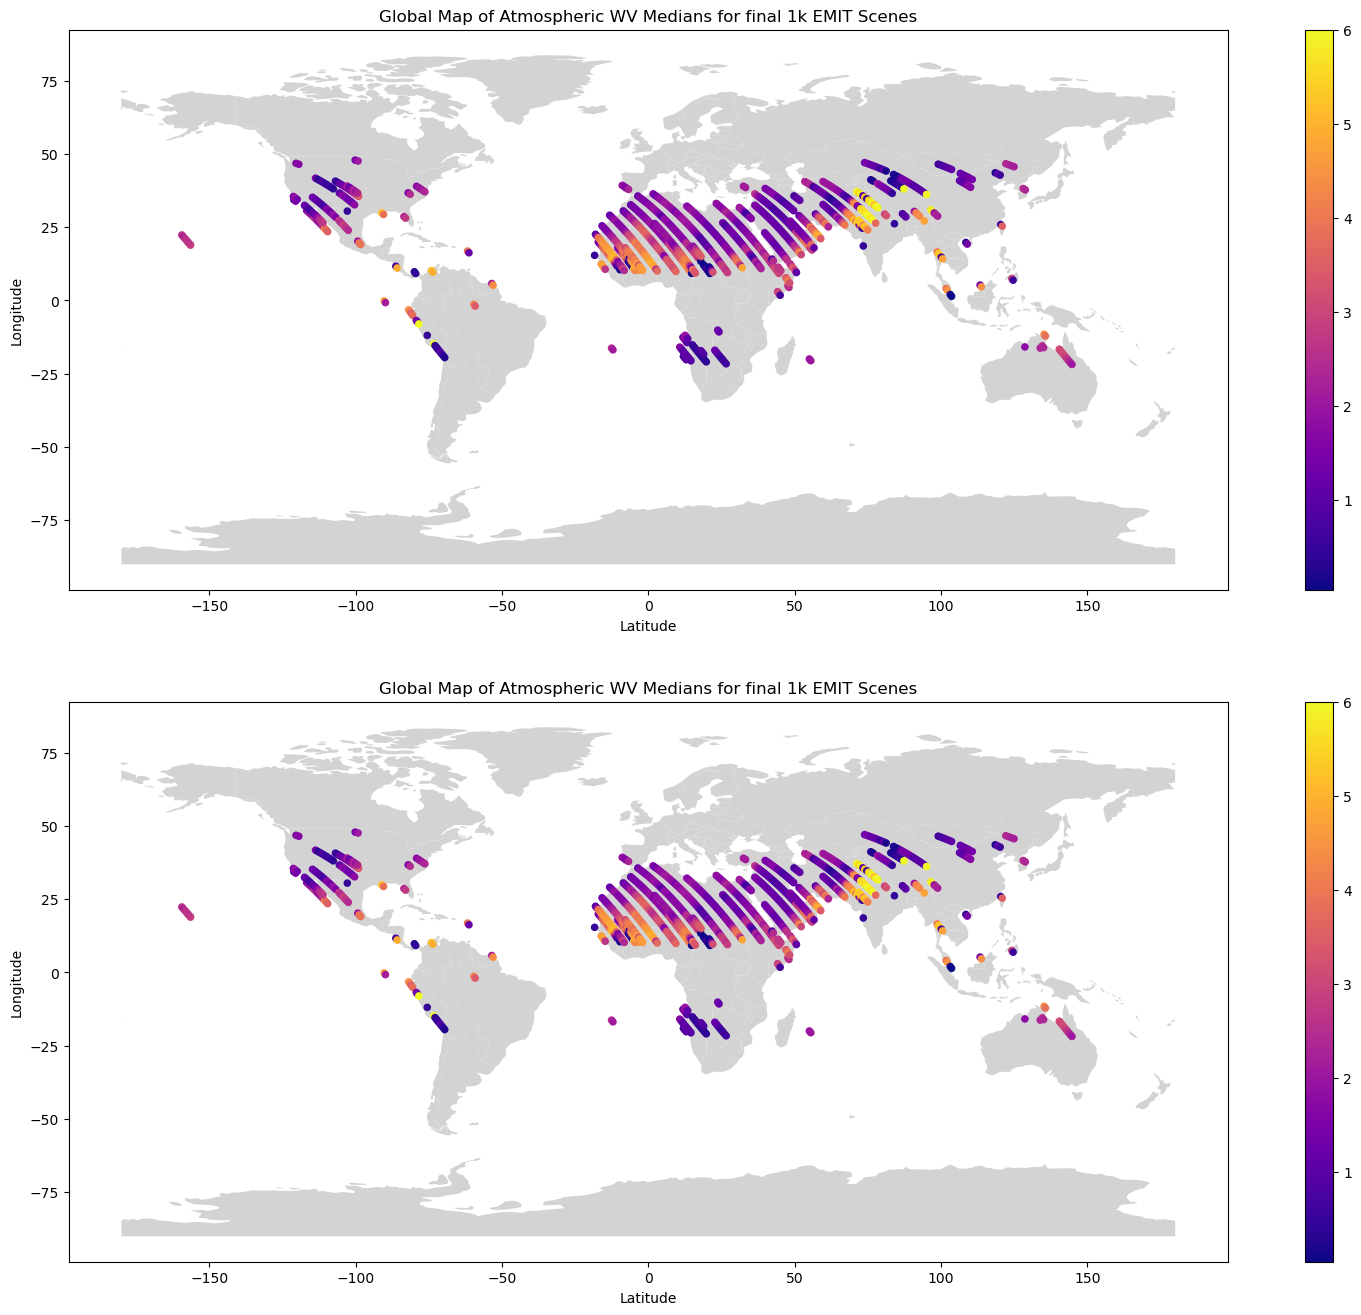

In [106]:
title = 'Global Map of Atmospheric WV Medians for final 1k EMIT Scenes'

fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    df_shortened.plot(x="Latitude", y="Longitude", kind="scatter", c=df_shortened['WV'], colormap="plasma", title= title, ax=ax[i])


C:\Users\vpatro\AppData\Local\Temp\ipykernel_20168\2373246052.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


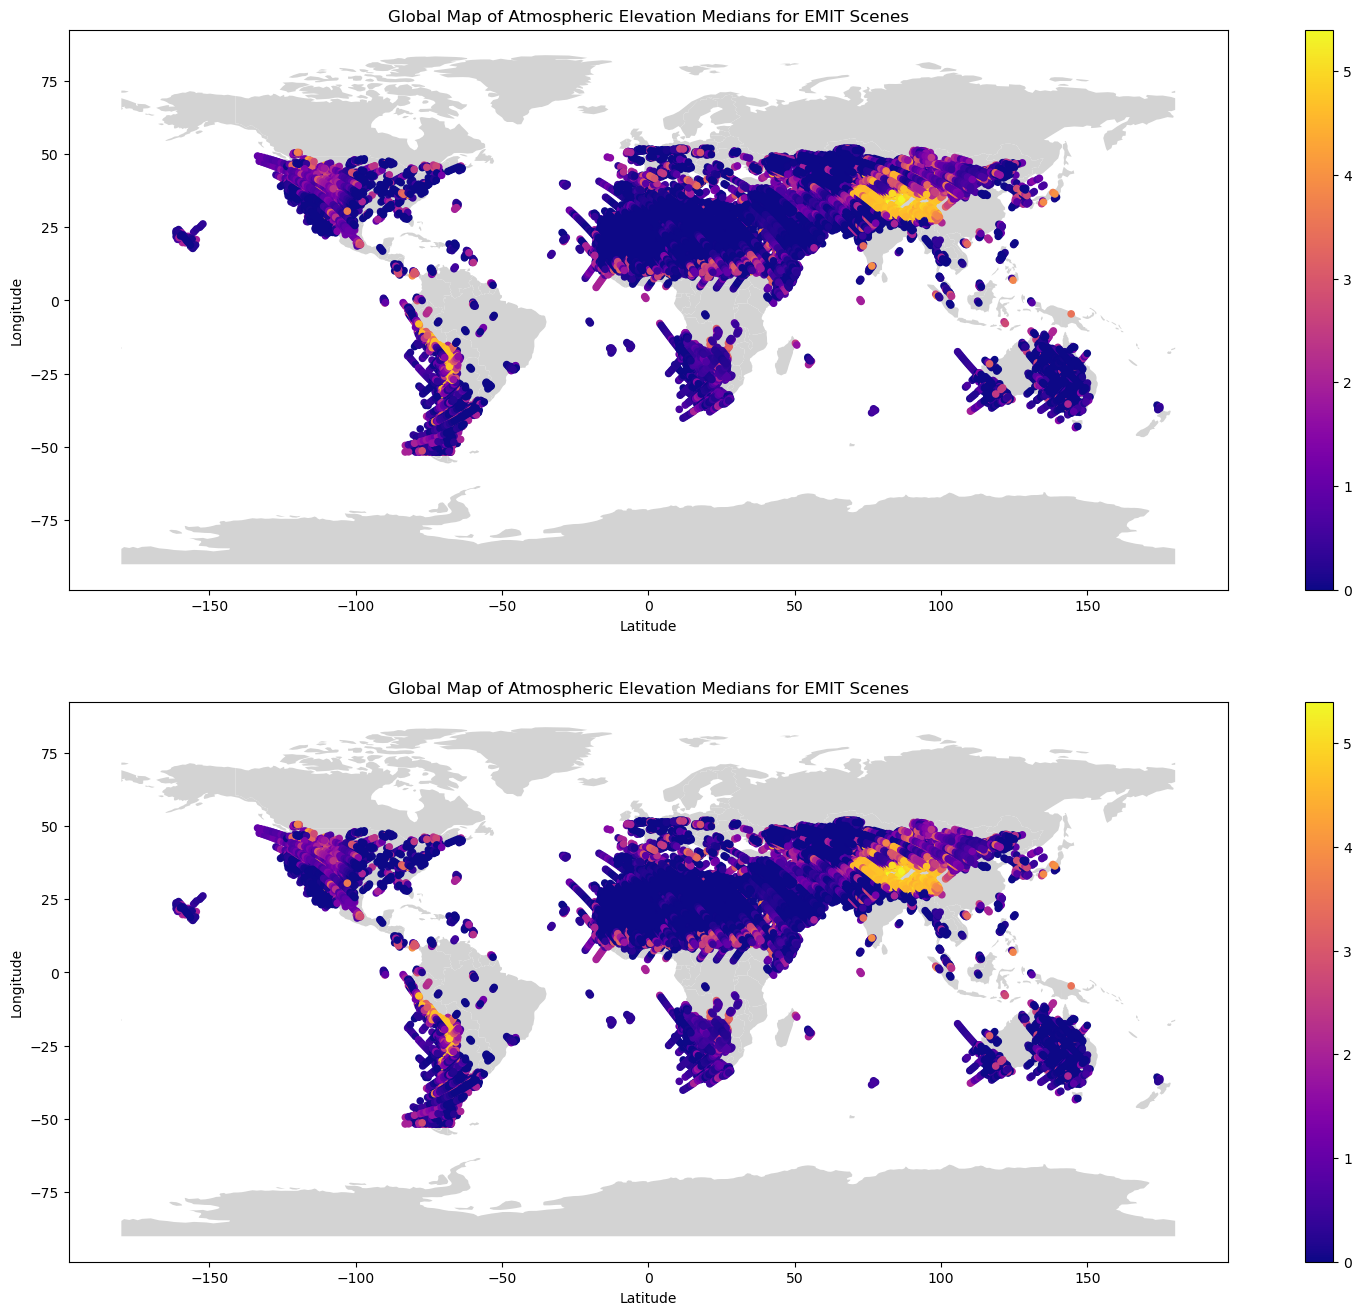

In [107]:
title = 'Global Map of Atmospheric Elevation Medians for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    df.plot(x="Latitude", y="Longitude", kind="scatter", c=df['elev'], colormap="plasma", title= title, ax=ax[i])
